In [1]:
import cv2
import re
import pytesseract
import os
import numpy as np
from matplotlib import pyplot as plt
from pytesseract import Output

In [2]:
arquivo = 'cupom2.jpg'

In [3]:
img = cv2.imread(arquivo)

In [4]:
custom_config = r'--oem 3 --psm 6 -l por'
texto_lido = pytesseract.image_to_string(img, config=custom_config)

print(texto_lido)

nome = texto_lido.split("\n")[0]
print(f'Nome: {nome}')


LOJAS RENHER S.A.
AU. ASSIS BRASIL, 1010 - PORTO ALEGRE - RS
CNPJ:92.754.738/0013-04 1E:096/0372202
03/05/2073 10:05:40  CCF:002200  — CO0:010169
CUPOM FISCAL

ITEM CóDIGO DESCRIÇÃO
QTD. UN. UL.UNITC R$) ST IAT UL.ITENC R$)
001 530236310 Blusa n3 4

1,000Un x 89,90 TO4 A 89,90%:
002 520196220 PERFUME PA

1,000Un x 199,00 FI à 199,00:
TOTAI RE 288,90
Dinheiro 288,90
T04=17,00%
ND5: Ib34ecabO54dO bi fdôac75edOe3dIF1
Total Inpostos Pagos “R$116,56 (40,35%)Fonte: IBPT
uuu. Tojasrenner.con.br
LJ Otavio Rocha
0P:014789-SANDRA NU: 001644
VPT2DXSNROBT-R/hB420X-pb=SAXVYR&BR-VxSux>T=T==>
2Ph 2PN/2EFC LOGRER ECF-IF
VERSÃO: 03.04.00 ECF:014 LJ:0015 OPR:B
SSSSSS5SSS IPGNONSE 03/05/2013 10:05:52
FAB:ZP030501143 at

Nome: LOJAS RENHER S.A.


### Retorna imagem em tons de cinza

In [5]:
def get_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Remoção de ruído

In [6]:
def remove_noise(img):
    return cv2.medianBlur(img, 5)

### Thresholding

In [7]:
def thresholding(img):
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

### Dilation

In [8]:
def dilate(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(img, kernel, iterations = 1)

### Erosion

In [9]:
def erode(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(img, kernel, iterations = 1)

### opening -> erosion + dilation

In [10]:
def opening(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

### Canny edge detection

In [11]:
def canny(img):
    return cv2.Canny(img, 100, 200)

### Skew correction

In [12]:
def deskew(img):
    coords = np.column_stack(np.where(img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.wapAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

### Match template

In [13]:
def match_template(img, template):
    return cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

## Workspace:

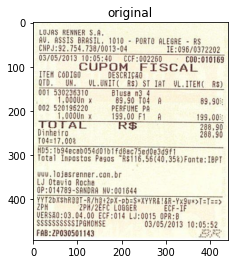

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('original')
plt.show()

In [15]:
# de_skew = opening(img)
# gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
# plt.imshow(deskew)
# plt.title('deskew')
# plt.show()

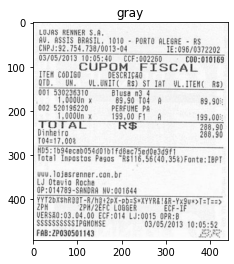

In [16]:
gray = get_grayscale(img)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray_rgb)
plt.title('gray')
plt.show()

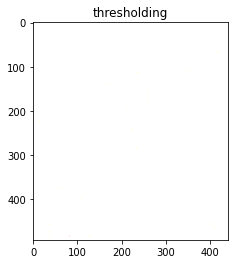

In [17]:
thresh = thresholding(img)
thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh_rgb)
plt.title('thresholding')
plt.show()

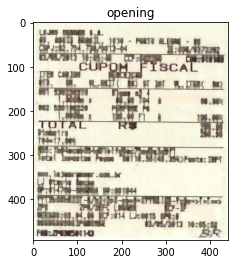

In [18]:
opening = opening(img)
opening_rgb = cv2.cvtColor(opening, cv2.COLOR_BGR2RGB)
plt.imshow(opening_rgb)
plt.title('opening')
plt.show()

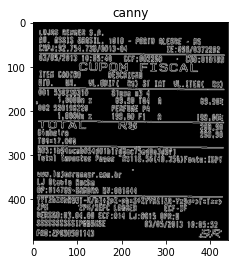

In [19]:
canny_ = canny(img)
canny_rgb = cv2.cvtColor(canny_, cv2.COLOR_BGR2RGB)
plt.imshow(canny_rgb)
plt.title('canny')
plt.plot(4,4)
plt.show()

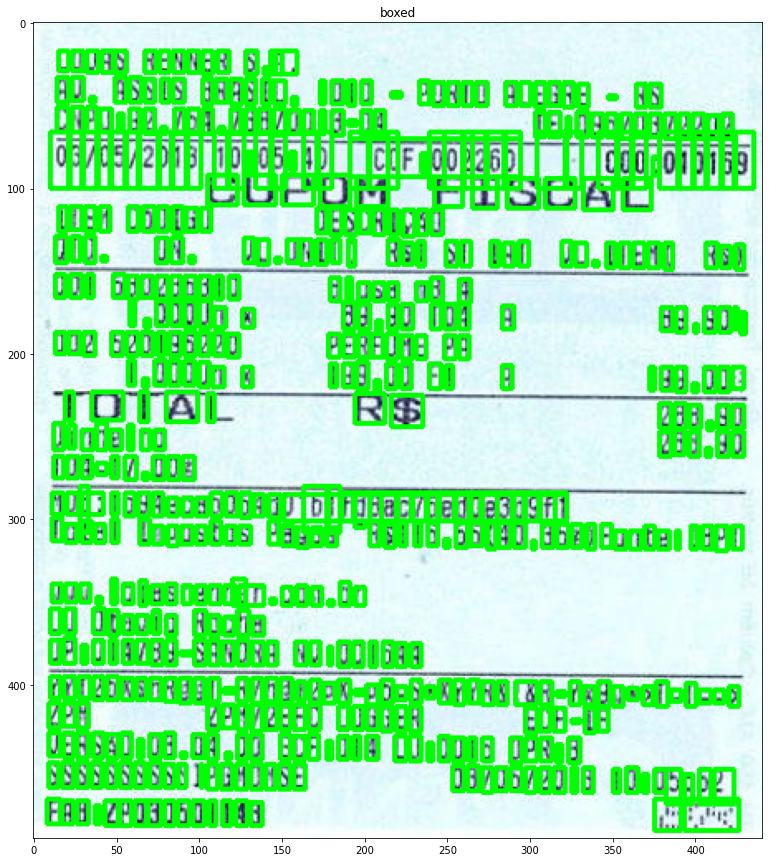

In [20]:
h, w, c = img.shape
box_img = img
boxes = pytesseract.image_to_boxes(box_img, config=custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    box_img = cv2.rectangle(box_img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)


plt.figure(figsize = (25,15))
plt.imshow(box_img)
plt.title('boxed')
plt.plot(8,8)
plt.show()

"LOJAS"
"RENHER"
"S.A."
"AU."
"ASSIS"
"BRASIL,"
"1010"
"-"
"PORTO"
"ALEGRE"
"-"
"RS"
"CNPJ:92.754.738/0013-04"
"1E:096/0372202"
"03/05/2073"
Data: 03/05/2073
"CUPOM"
"FISCAL"
"ITEM"
"CóDIGO"
"DESCRIÇÃO"
"UL.UNITC"
"R$)"
"ST"
"R$)"
"001"
"530236310"
"Blusa"
"n3"
"4"
"1,000Un"
"x"
"89,90"
"TO4"
"A"
"002"
"520196220"
"PERFUME"
"PA"
"1,000Un"
"x"
"199,00"
"À"
"TOTAI"
"RE"
"288,90"
"Dinheiro"
"288,90"
"Total"
"Inpostos"
"Pagos"
"IBPT"
"LJ"
"Otavio"
"Rocha"
"0P:014789-SANDRA"
"LOGRER"
"ECF-IF"
"ECF:014"
"LJ:0015"
"OPR:B"
"03/05/2013"
Data: 03/05/2013
"10:05:52"
"FAB:ZP030501143"


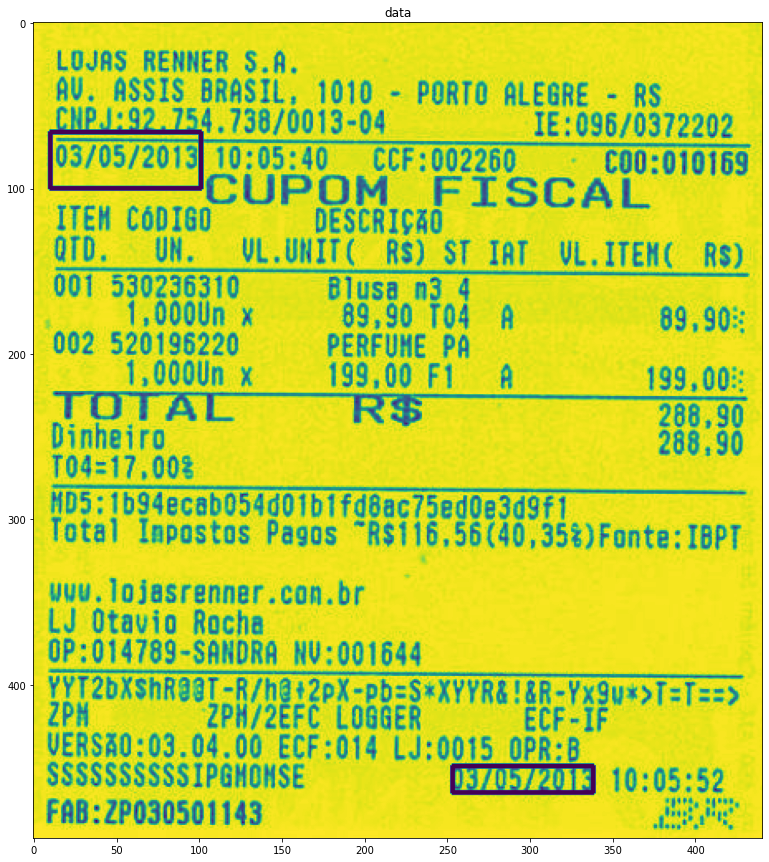

In [21]:
h, w, c = img.shape

des_img = cv2.imread(arquivo)
# des_img = deskew(cv2.imread('cupom2.jpg'))
# des_img_rgb = cv2.cvtColor(des_img, cv2.COLOR_BGR2RGB)
gray_img = get_grayscale(des_img)
cann = canny(gray_img)
box_word_img = gray_img

my_config={'keep_default_na': False, 'na_values': ["nan"]}
d = pytesseract.image_to_data(box_word_img, output_type=Output.DICT, lang='por',config=custom_config)
date_pattern = '^(0?[1-9]|[12][0-9]|3[01])[\/\-](0?[1-9]|1[012])[\/\-]\d{4}$'
#cnpj_pattern = '([0-9]{2}[\.]?[0-9]{3}[\.]?[0-9]{3}[\/]?[0-9]{4}[-]?[0-9]{2})|([0-9]{3}[\.]?[0-9]{3}[\.]?[0-9]{3}[-]?[0-9]{2})'
cnpj_pattern = '[0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        texto = d['text'][i]
        print(f'"{texto}"')
        if re.match(date_pattern, texto):
            print(f'Data: {texto}')
            box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        if re.match(cnpj_pattern, texto):
            print(f'CNPJ: {texto}')
            box_word_img = cv2.rectangle(box_word_img, (x, y), (x + w, y + h), (0, 255, 0), 2)


plt.figure(figsize = (25,15))
plt.imshow(box_word_img)
plt.title('data')
plt.plot(8,8)
plt.show()

In [22]:
cnpj = re.search(r'[0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}', texto_lido)
if cnpj:
    print(f'CNPJ: {cnpj.group()}')
    
data = re.search('\d{2}/\d{2}/\d{4}', texto_lido)
if data:
    print(f'Data: {data.group()}')

dividido = re.split("\s", texto_lido)

val_pattern = '[0-9]'
# val_pattern [0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}

isTotal = False
hasTotal = False

for t in dividido:
    if re.match(date_pattern, t):
        print(f'Data (2): {t}')
    if re.match(cnpj_pattern, t):
        print(f'CNPJ (2): {t}')
    if re.match('total', t, re.IGNORECASE) and hasTotal == False:
        isTotal = True
    if isTotal:
        if re.match(val_pattern, t):
            print(f'Total: {t}')
            isTotal = False
            hasTotal = True

print(f'\nTexto: {texto_lido}')
print(f'Dividido: {dividido}')

CNPJ: 92.754.738/0013-04
Data: 03/05/2073
Data (2): 03/05/2073
Total: 0P:014789-SANDRA
Data (2): 03/05/2013

Texto: LOJAS RENHER S.A.
AU. ASSIS BRASIL, 1010 - PORTO ALEGRE - RS
CNPJ:92.754.738/0013-04 1E:096/0372202
03/05/2073 10:05:40  CCF:002200  — CO0:010169
CUPOM FISCAL

ITEM CóDIGO DESCRIÇÃO
QTD. UN. UL.UNITC R$) ST IAT UL.ITENC R$)
001 530236310 Blusa n3 4

1,000Un x 89,90 TO4 A 89,90%:
002 520196220 PERFUME PA

1,000Un x 199,00 FI à 199,00:
TOTAI RE 288,90
Dinheiro 288,90
T04=17,00%
ND5: Ib34ecabO54dO bi fdôac75edOe3dIF1
Total Inpostos Pagos “R$116,56 (40,35%)Fonte: IBPT
uuu. Tojasrenner.con.br
LJ Otavio Rocha
0P:014789-SANDRA NU: 001644
VPT2DXSNROBT-R/hB420X-pb=SAXVYR&BR-VxSux>T=T==>
2Ph 2PN/2EFC LOGRER ECF-IF
VERSÃO: 03.04.00 ECF:014 LJ:0015 OPR:B
SSSSSS5SSS IPGNONSE 03/05/2013 10:05:52
FAB:ZP030501143 at

Dividido: ['LOJAS', 'RENHER', 'S.A.', 'AU.', 'ASSIS', 'BRASIL,', '1010', '-', 'PORTO', 'ALEGRE', '-', 'RS', 'CNPJ:92.754.738/0013-04', '1E:096/0372202', '03/05/2073', '10:0

LOJAS
RENNER
S.A.
AV.
ASSIS
BRASIL,
1010
-
PORTO
ALEGRE
-
AS
1E:096/0372202
CUPOM
FISCAL
ITEM
CÓDIGO
DESCRIÇÃO
QTD.
UM.
R$)
ST
IAT
R$)
001
530236310
Blusa
n3
4
1,000Un
x
89,90
TO4
A
002
520196220
PERFUME
PA
1,000Un
x
199,00
F1
à
208,90
Dinheiro
268.90
ND3:
Total
Inpostos
Pagos
IBPT
LJ
Otavio
Rocha
0P:014789-SANDRA
ZPH/2EFC
LOGGER
ECF-IF
ECF:014
LJ:0015
OPR:B
03/05/2013
FAB:ZP030501143


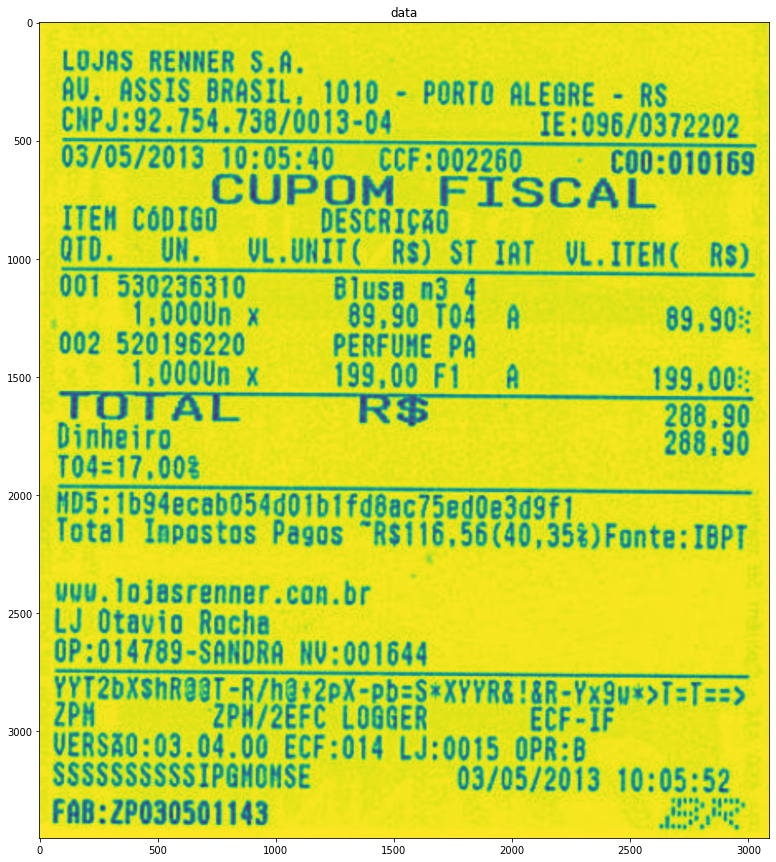

In [23]:
# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread(arquivo)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
noise = remove_noise(image)
# dilate = dilate(image)
# openin = opening(image)
can = canny(image)
size = image = cv2.resize(gray,(0,0),fx=7,fy=7)

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='por', config='--psm 6')
texto_lido = pytesseract.image_to_string(image, config=custom_config)
d = pytesseract.image_to_data(size, output_type=Output.DICT, lang='por',config=custom_config)

# print(data)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:
        texto = d['text'][i]
        print(texto)
        
plt.figure(figsize = (25,15))
plt.imshow(size)
plt.title('data')
plt.plot(8,8)
plt.show()


# Métoddos

In [51]:
def show_img(img):
    plt.figure(figsize = (25,15))
    plt.imshow(img)
    plt.title('Cupom')
    plt.plot(8,8)
    plt.show()

In [104]:
def busca_dados(arquivo):
    
    nome_arquivo, extensao_arquivo = os.path.splitext(arquivo)
    
    print(f'Extensão: {extensao_arquivo}')
    if (extensao_arquivo != '.png' and extensao_arquivo != '.jpg'):
        return None
    
    print(f'Processando: {nome_arquivo}')
    
    data_compra = ''
    cnpj = ''
    total = ''

    img_cupom = cv2.imread(arquivo)
    img_scale = cv2.resize(img_cupom, (0, 0), fx=2, fy=2)
    img_gray = cv2.cvtColor(img_scale, cv2.COLOR_BGR2GRAY)


    custom_config = r'--oem 3 --psm 6 -l por'
    date_pattern = '^(0?[1-9]|[12][0-9]|3[01])[\/\-](0?[1-9]|1[012])[\/\-]\d{4}$'
    cnpj_pattern = '[0-9]{2}\.?[0-9]{3}\.?[0-9]{3}\/?[0-9]{4}\-?[0-9]{2}'
    val_pattern = '[0-9]'

    cupom_fulltext = pytesseract.image_to_string(img_gray, config=custom_config)

    nome_estabelecimento = re.match('\A.*', cupom_fulltext).group()

    cnpj_search = re.search(cnpj_pattern, cupom_fulltext)
    if cnpj_search != None:
        cnpj = cnpj_search.group()
    data_search = re.search(date_pattern, cupom_fulltext)
    if data_search != None:
        data_compra = data_search.group()

    # lines = re.split("\s", cupom_fulltext)


    isTotal = False
    hasTotal = False

    cupom_data = pytesseract.image_to_data(img_gray, output_type=Output.DICT, lang='por',config=custom_config)

    n_boxes = len(cupom_data['text'])
    for t in range(n_boxes):
        texto = cupom_data['text'][t]
        # print(texto)
    # for t in lines:
        if re.match(date_pattern, texto):
            data_compra = texto
        if re.match(cnpj_pattern, texto):
            cnpj = texto
        if re.match('total', texto, re.IGNORECASE) and hasTotal == False:
            isTotal = True
        if isTotal:
            if re.match(val_pattern, texto):
                total = texto
                isTotal = False
                hasTotal = True


    print(f'Nome: {nome_estabelecimento}')
    print(f'CNPJ: {cnpj}')
    print(f'Data: {data_compra}')
    print(f'Total: {total}')
    print('\n')

    return nome_estabelecimento, cnpj, data_compra, total


In [97]:
def iterar_arquivos():
    dirName = 'arquivos'
    file_list = os.listdir(dirName)
    for entry in file_list:
        arquivo = os.path.join(dirName, entry)
        dados = busca_dados(arquivo)
        if dados != None:
            salvar_ocr(arquivo, dados)

In [112]:
def salvar_ocr(arquivo, dados):
    nome_arquivo, extensao_arquivo = os.path.splitext(arquivo)
    with open(nome_arquivo + '.txt', 'w') as out:
        out.write(f'Estabalecimento: {dados[0]}\n')
        out.write(f'CNPJ: {dados[1]}\n')
        out.write(f'Data: {dados[2]}\n')
        out.write(f'Total: {dados[3]}')

# Main

In [113]:
iterar_arquivos()

Extensão: .jpg
Processando: arquivos\cupom2
Nome: LOJAS RENNER S.A.
CNPJ: 92.754.738/0013-04
Data: 03/05/2013
Total: 288,90


Extensão: .txt
Extensão: .jpg
Processando: arquivos\cupom3
Nome: CUPOM FISCAL
CNPJ: 
Data: 05/02/2015
Total: 200,00


Extensão: .txt
Extensão: .jpg
Processando: arquivos\cupom4
Nome: Epson do Brasil Ind, e Com.
CNPJ: 52.106.911/0001-00
Data: 07/07/2007
Total: 21.00


Extensão: .txt
